**Nama : Firlli Yuzia Rahmanu**

**NIM : 210411100163**

**Kelas : PSD A**



# **DATA Toronto emotional speech set (TESS)**
# **MEMPREDIKSI EMOSI DARI DATA AUDIO**




#**1. Deskripsi Dataset**

Data diambil dari https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess?resource=download

Tujuan Analisis Data : Memprediksi Emosi dari data audio

Deskripsi data :
- Ada satu set 200 kata target yang diucapkan oleh dua aktris (berusia 26 dan 64 tahun) dan rekaman dibuat tersebut menggambarkan masing-masing tujuh emosi yaitu (marah, jijik, takut, bahagia) , kejutan menyenangkan, kesedihan, dan netral. Total ada 2800 titik data (file audio).

- Kumpulan data tersebut disusun sedemikian rupa sehingga masing-masing dari dua aktor wanita dan emosi mereka terkandung dalam foldernya sendiri. Dan di dalamnya, semua file audio 200 kata target dapat ditemukan. Format file audio adalah format WAV.







# **Penjelasan Detail Terkait 7 Emosi yang Ada pada dataset:**
1. **Angry (Marah)** : Emosi ini sering diidentifikasi melalui intonasi yang keras, tinggi, atau agresif dalam suara seseorang. Terkadang, ada kecenderungan untuk menghasilkan suara yang meningkat dan cepat.
2. **Disgust (Jijik)** :Emosi ini sering kali terkait dengan perasaan tidak suka atau jijik terhadap sesuatu. Dalam konteks suara, mungkin terdapat elemen seperti intonasi yang keras atau terengah-engah yang menunjukkan ketidaknyamanan atau keengganan.
3. **Fear (Takut)** : Emosi suara takut sering ditandai dengan intonasi yang gemetar, napas yang cepat, atau nada suara yang meninggi. Terkadang, suara juga dapat terdengar terputus-putus atau gemetar.
4. **Happy (Bahagia)** : Emosi kebahagiaan dalam suara umumnya terdengar dalam bentuk intonasi yang ceria, riang, dan bisa saja meninggi. Suara juga bisa terdengar lebih terbuka dan enerjik.
5. **Neutral (Netral)** : Emosi netral ditandai dengan ketiadaan ekspresi emosional yang jelas dalam suara. Ini adalah keadaan di mana seseorang tidak menunjukkan emosi khusus tertentu dan suaranya cenderung datar.
6. **Pleasant Suprise (Kejutan yang menyenangkan)** : Emosi ini sering terdengar dalam suara yang mengejutkan tapi positif, mungkin terdapat elemen intonasi yang meninggi secara tiba-tiba namun dengan nada yang menyenangkan.
7. **Sad (Sedih)** : Emosi suara yang sedih biasanya ditandai dengan intonasi yang rendah, lambat, dan mungkin terdapat elemen napas yang dalam atau getar emosional dalam suara.

- Ada 7 kelas emosi yaitu angry (marah), disgust (jijik), fear (takut), happy (Bahagia), neutral (netral), Pleasant Suprise (Kejutan yang menyenangkan), dan sad (sedih).
- terdapat 14 file yang berisi 200 file WAV, jadi jumlah data 2800 audio
- Cara mendapatkan dataset diatas yaitu merekam suara seseorang dengan berbagai emosi.

In [ ]:
# Connect To Google Drive
# untuk menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/psd/tugas/dataset

/content/drive/MyDrive/psd/tugas/dataset


# **IMPORT LIBRARY**



In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode

**A. Library os**

Library os dalam Python digunakan untuk berinteraksi dengan sistem operasi, seperti membuat, mengubah, atau mengelola direktori dan berkas (file)


**B. Library Librosa**

Library librosa digunakan dalam pemrosesan sinyal audio pada Python. Alasan utama penggunaan librosa pada data audio adalah karena menyediakan beragam fitur yang berguna untuk analisis audio dan pemrosesan sinyal.

1. Ekstraksi Fitur Audio: Librosa menyediakan fungsi yang mudah digunakan untuk mengekstraksi fitur audio, seperti mel-frequency cepstral coefficients (MFCCs), spektrogram, tempo, ritme, dan banyak fitur lainnya. Fitur-fitur ini sangat penting dalam pemrosesan audio untuk tugas seperti klasifikasi, deteksi, atau pemahaman audio.

2. Praproses dan Normalisasi: Librosa memudahkan praproses audio seperti normalisasi, pemberian skala, dan pembersihan sinyal audio yang mungkin diperlukan sebelum analisis lanjutan.

3. Visualisasi Audio: Library ini memungkinkan untuk membuat visualisasi dari data audio, seperti spektrogram, waveform, dan representasi visual lainnya yang membantu dalam pemahaman dan analisis audio.

**C. Library Numpy**

NumPy (np) adalah library Python yang digunakan untuk melakukan komputasi numerik. Ini menyediakan objek array multidimensi yang kuat, serta fungsi-fungsi matematika yang memungkinkan operasi efisien pada array ini.NumPy untuk membaca data audio ke dalam array numerik

**D. Library Pandas**

Pandas (pd) adalah library Python yang memungkinkan analisis data mudah dan kuat. Ini menyediakan struktur data tingkat tinggi dan alat untuk memanipulasi data seperti DataFrame, yang memungkinkan untuk memanipulasi data dengan cara yang nyaman dan efisien.Pandas DataFrame untuk analisis lebih lanjut. untuk membaca file audio dan menganalisis beberapa statistik dasar dari data audio

**E. Library scipy.stats**

scipy.stats menyediakan banyak fungsi statistik yang berguna, seperti skew untuk menghitung skewness, kurtosis untuk menghitung kurtosis, dan mode untuk menemukan nilai mode dari data.Dalam data audio, menggunakan fungsi-fungsi ini untuk mendapatkan informasi statistik seperti bentuk distribusi, kecondongan, dan kemunculan nilai-nilai yang sering muncul dalam data audio tersebut.

daftar nama-nama folder yang berisi data audio. Setiap nama folder mewakili kategori atau jenis emosi yang terkait dengan data audio yang terdapat di dalamnya.

In [ ]:
# Daftar nama folder yang berisi data audio
# setiap nama folder mewakili kategori atau jenis emosi
folders=['YAF_sad','YAF_pleasant_surprised','YAF_neutral',
         'YAF_happy','YAF_fear','YAF_disgust','YAF_angry',
         'OAF_Sad','OAF_Pleasant_surprise','OAF_neutral',
         'OAF_happy','OAF_Fear','OAF_disgust',
         'OAF_angry',
         ]

# **CALCULATE STATISTICS**

Fungsi calculate_statistics ini dirancang untuk menghitung sejumlah statistik dari data audio yang diberikan dalam file audio yang diidentifikasi oleh audio_path. Fungsi ini menggunakan library librosa untuk membaca dan melakukan beberapa perhitungan statistik umum dan fitur-fitur audio pada data audio yang diwakili oleh file di audio_path.

Berikut penjelasan tiap perhitungan statistik :

**1. Mean (Rata-rata)**

Mean, atau rata-rata, adalah salah satu ukuran pusat yang menggambarkan nilai tengah dari sebuah himpunan data numerik. Ini dihitung dengan menjumlahkan semua nilai dalam himpunan data dan kemudian membagi jumlah tersebut dengan jumlah total nilai.

Mean ${x}$ dihitung dengan menggunakan rumus:

$
\bar{x} = \frac{{x_1 + x_2 + x_3 + \ldots + x_n}}{n} = \frac{{\sum_{i=1}^{n} x_i}}{n}
$

dimana :

- $\bar{x}$: Simbol rata-rata atau mean dari himpunan data.
- $x_1, x_2, x_3, \ldots, x_n$: Merupakan nilai-nilai individu dalam himpunan data.
- $n$: Jumlah total nilai dalam himpunan data.
- $\sum_{i=1}^{n} x_i$: Penjumlahan dari semua nilai dalam himpunan data.
- $\frac{{x_1 + x_2 + x_3 + \ldots + x_n}}{n}$: Rumus untuk menghitung mean dengan membagi jumlah total nilai dengan jumlah elemen dalam himpunan data.


**2. Standar Deviasi**

Standar deviasi adalah ukuran sebaran atau penyebaran data dari nilai rata-rata dalam suatu himpunan data. Secara matematis, standar deviasi mengukur sejauh mana nilai-nilai dalam data tersebut tersebar dari nilai rata-rata. Rumus standar deviasi biasa adalah sebagai berikut:

$\text{Standar Deviasi} (\sigma) = \sqrt{\frac{\sum_{i=1}^{N}(x_i - \mu)^2}{N}}$

dimana :

- ${N}$ : jumlah total elemen dalam himpunan data.
- $x_i$ : setiap nilai dalam data.
- $\mu$ : nilai rata-rata dari data.
- $\sigma$ : standar deviasi.

**3. Maksimum (max)**

Maksimum adalah nilai terbesar dalam sekumpulan data atau fungsi matematika. Dalam matematika, jika kita memiliki himpunan nilai , maka maksimumnya
max adalah nilai terbesar di antara nilai-nilai tersebut.

Rumus Maksimum :

$\max(x_1, x_2, x_3, \ldots, x_n) = \text{nilai terbesar dari } x_1, x_2, x_3, \ldots, x_n$

dimana :
- $(x_1, x_2, x_3, \ldots, x_n)$ :Merepresentasikan nilai-nilai dalam himpunan data.
- $\max$ : Fungsi maksimum yang memberikan nilai terbesar dalam himpunan data.
- $\text{nilai terbesar dari } x_1, x_2, x_3, \ldots, x_n$ : Merupakan nilai terbesar di antara semua nilai yang ada dalam himpunan data tersebut.

**4. Minimum (min)**

Fungsi $\min$ ini mengambil nilai terkecil dari sekumpulan nilai yang diberikan.
Berikut adalah penjelasan rumus  fungsi $\min$  :

$$\min(x_1, x_2, x_3, \ldots, x_n)$$

Dalam rumus di atas:
- $\min$: Menunjukkan fungsi minimum.
- $(x_1, x_2, x_3, \ldots, x_n)$: Nilai-nilai atau variabel yang ingin dicari nilai terkecilnya.

**5. Nilai Tengah (median)**

Median adalah nilai tengah dari sebuah himpunan data yang telah diurutkan. Jika kita memiliki himpunan data yang terdiri dari n angka, median adalah nilai yang terletak di tengah ketika data diurutkan secara berurutan dari nilai terkecil hingga nilai terbesar. Median sangat berguna karena tidak dipengaruhi oleh nilai-nilai ekstrim atau outlier dalam data.

Rumus untuk menemukan nilai median dari himpunan data yang terdiri dari n angka adalah sebagai berikut:

a. jika n ganjil

$\text{Median} = \text{nilai pada posisi} \left(\frac{n + 1}{2}\right)$

dimana :

- $\frac{n + 1}{2}$: posisi median pada data yang telah diurutkan. Ini adalah nilai yang terletak di tengah himpunan data jika n ganjil.
- $n$ : jumlah total data dalam himpunan data.
- $\text{nilai pada posisi}$ : nilai yang terletak pada posisi tertentu dalam data yang telah diurutkan.
- $\text{Median}$ : nilai tengah dari himpunan data yang digunakan untuk menentukan pusat distribusi datanya.

b. jika n genap

$\text{Median}$ = $\frac{\text{nilai pada posisi}$ $\left(\frac{n}{2}\right) + \text{nilai pada posisi} \left(\frac{n}{2} + 1\right)}{2}$


dimana :
- $\frac{n}{2}$ : posisi tengah pertama pada data yang telah diurutkan.
- $\frac{n}{2} + 1$: posisi tengah kedua pada data yang telah diurutkan.





**6. Skewness**

Skewness adalah ukuran statistik yang mengukur asimetri dari distribusi data. Nilai skewness digunakan untuk menentukan seberapa simetris atau tidak simetris distribusi data terhadap nilai rata-ratanya. Jika skewness bernilai nol, distribusi data dianggap simetris. Jika skewness positif, distribusi cenderung memiliki ekor panjang di sebelah kanan nilai rata-ratanya (ekor panjang di sisi nilai yang lebih tinggi). Sebaliknya, jika skewness negatif, distribusi cenderung memiliki ekor panjang di sebelah kiri nilai rata-ratanya (ekor panjang di sisi nilai yang lebih rendah).

Rumus untuk menghitung skewness dalam statistik adalah sebagai berikut:

$\text{Skewness} = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3$

dimana :    

- $n$ : Jumlah total data dalam sampel.
- $x_i$ : Setiap nilai individu dalam sampel.
- $\bar{x}$: Rata-rata (mean) dari sampel.
- $s$ : Standar deviasi (standard deviation) dari sampel.
- $\sum_{i=1}^{n}$ : Simbol sigma yang menandakan penjumlahan untuk semua nilai dari $i = 1 $ hingga $n$
- $\left( \frac{x_i - \bar{x}}{s} \right)^3$ : Bagian dari rumus yang menghitung nilai setiap data $x_i$ dikurangi rata-rata, kemudian dibagi dengan standar deviasi, lalu dipangkatkan tiga.

**7. Kurtosis**


Kurtosis adalah sebuah ukuran statistik yang menggambarkan "kepuntiran" distribusi data. Ini mengukur seberapa tajam atau landai distribusi suatu dataset terhadap rata-rata (kurva lonceng atau distribusi normal). Nilai kurtosis memberikan informasi tentang ekstremis ekor distribusi data, baik lebih banyak atau lebih sedikitnya nilai-nilai yang jauh dari rata-rata.

Rumus umum untuk kurtosis adalah:

$Kurtosis = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^4}{n \cdot s^4} - 3$

dimana :  
- $\sum_{i=1}^{n} (x_i - \bar{x})^4$: Jumlah dari perbedaan setiap nilai dalam sampel dengan rata-rata sampel, dipangkatkan dengan 4.
- $n$: Jumlah total nilai dalam sampel.
- $s$: Simpangan baku (standar deviasi) dari sampel.
- $3$: Nilai tetap untuk menghilangkan nilai kurtosis dari distribusi normal.

**8. Kuartil 1**


Kuartil pertama (Q1) adalah nilai tengah dari separuh data terkecil dalam suatu himpunan data. Secara matematis, kuartil pertama membagi data menjadi dua bagian sama besar, di mana 25% data terkecil berada di bawah kuartil ini.

Rumus untuk menghitung kuartil pertama adalah sebagai berikut:

Jika data diurutkan dari yang terkecil hingga yang terbesar, Q1 adalah nilai yang terletak pada posisi $\frac{n + 1}{4}$, di mana $n$ adalah jumlah total data.

$Q1 = \text{nilai ke-} \left( \frac{n + 1}{4} \right)$

dimana :       

- $Q1$ : kuartil pertama.
- $n$ : jumlah total data.
- $\frac{n + 1}{4}$ : indeks posisi data yang menunjukkan kuartil pertama.

**9. Kuartil 3**


Kuartil ketiga (Q3) adalah nilai yang membagi data ke dalam dua bagian yang sama besar, dengan 75% data di bawah nilai ini dan 25% di atasnya. Ini adalah salah satu dari tiga nilai kuartil yang membagi data ke dalam empat bagian sama besar.

Rumus untuk menghitung kuartil ketiga adalah dengan menggunakan persentil ke-75 dari data yang telah diurutkan secara terurut menaik. Ini bisa dihitung dengan rumus:

$Q3 = \text{Persentil ke-75} = \text{nilai pada posisi} \left(\frac{3n}{4}\right)$

dimana :     
- $Q3$ :  Kuartil ketiga, merupakan nilai yang membagi data ke dalam 75% data di bawahnya dan 25% di atasnya.
- $n$ :   Jumlah total data dalam sampel atau set data yang diurutkan.
- $\frac{3n}{4}$ : posisi data yang akan menjadi kuartil ketiga. Ini berarti pada posisi ini, 75% data telah diakomodasi dan 25% sisanya berada di atasnya.


**10. Zero Crossing Rate (ZCR)**

Zero Crossing Rate (ZCR) adalah salah satu fitur penting dalam pemrosesan sinyal audio yang mengukur seberapa sering sinyal melintasi sumbu horizontal atau nol. ZCR menggambarkan jumlah perubahan tanda dalam sinyal audio seiring waktu. Ini berguna dalam analisis karakteristik sinyal seperti tingkat kebisingan atau kekasaran.

Rumus untuk menghitung ZCR adalah sebagai berikut:

$ZCR = \frac{1}{N-1} \sum_{n=1}^{N-1} \left| \text{sign}(x[n]) - \text{sign}(x[n-1]) \right|$

dimana :    
- $ZCR$ : Zero Crossing Rate (Tingkat Lintasan Nol)
- $N$ : Jumlah sampel dalam sinyal audio
- $n$ : Indeks sampel audio dari 1 hingga $N-1$
- $x[n]$ : Nilai sampel audio pada waktu $n$
- $\text{sign}(.): Fungsi yang mengembalikan tanda dari nilai, yaitu -1 untuk nilai negatif, 0 untuk nilai nol, dan 1 untuk nilai positif.



**11. Root Mean Square Error (RMSE)**

Root Mean Square Error (RMSE) adalah metrik evaluasi yang digunakan dalam statistik dan pembelajaran mesin untuk mengukur seberapa besar deviasi atau kesalahan rata-rata dari prediksi terhadap nilai sebenarnya. Ini umumnya digunakan untuk mengukur kinerja model prediksi dalam memperkirakan nilai sebenarnya dari prediksi yang dihasilkan.

Berikut adalah representasi rumus RMSE :     
$\text{RMSE} = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n}}$

dimana :
- $n$ : jumlah sampel atau observasi.
- $y_i$ : nilai sebenarnya dari observasi ke-$i$
- $\hat{y}_i$ : nilai prediksi dari observasi ke-$i$


In [ ]:
def calculate_statistics(audio_path):
    y, sr = librosa.load(audio_path)  # Memuat data audio dari file yang diberikan dalam audio_path. Variabel y menyimpan data audio dan sr merupakan nilai sampling rate dari data audio tersebut.

    # UNTUK MENGHITUNG NILAI STATISTIKA
    # Menghitung rata-rata, standar deviasi, nilai maksimum, nilai minimum, dan median dari data audio menggunakan fungsi NumPy
    mean = np.mean(y)
    std_dev = np.std(y)
    max_value = np.max(y)
    min_value = np.min(y)
    median = np.median(y)
    skewness = skew(y)  # Menghitung skewness dari data audio
    kurt = kurtosis(y)  # Menghitung kurtosis dari data audio
    q1 = np.percentile(y, 25)  # Menghitung kuartil pertama dari data audio
    q3 = np.percentile(y, 75)  # Menghitung kuartil ketiga dari data audio
    mode_value, _ = mode(y)  # Menghitung mode dari data audio
    iqr = q3 - q1  # Menghitung rentang antarkuartil (IQR) dari data audio

    # UNTUK MENGHITUNG NILAI ZCR (Zero Crossing Rate)
    zcr_mean = np.mean(librosa.feature.zero_crossing_rate(y=y))  # Menghitung rata-rata ZCR
    zcr_median = np.median(librosa.feature.zero_crossing_rate(y=y))  # Menghitung median ZCR
    zcr_std_dev = np.std(librosa.feature.zero_crossing_rate(y=y))  # Menghitung standar deviasi ZCR
    zcr_kurtosis = kurtosis(librosa.feature.zero_crossing_rate(y=y)[0])  # Menghitung kurtosis ZCR
    zcr_skew = skew(librosa.feature.zero_crossing_rate(y=y)[0])  # Menghitung skewness ZCR

    # UNTUK MENGHITUNG NILAI RMSE (Root Mean Square Error)
    rmse = np.sum(y**2) / len(y)  # Menghitung nilai RMSE
    rmse_median = np.median(y**2)  # Menghitung median RMSE
    rmse_std_dev = np.std(y**2)  # Menghitung standar deviasi RMSE
    rmse_kurtosis = kurtosis(y**2)  # Menghitung kurtosis RMSE
    rmse_skew = skew(y**2)  # Menghitung skewness RMSE

    return [mean, std_dev, max_value, min_value, median, skewness, kurt, q1, q3, mode_value, iqr, zcr_mean, zcr_median, zcr_std_dev, zcr_kurtosis, zcr_skew, rmse, rmse_median, rmse_std_dev, rmse_kurtosis, rmse_skew]

 ketika features diinisialisasi sebagai list kosong, tidak ada data atau nilai apa pun yang disimpan di dalamnya. List ini kemudian dapat digunakan untuk mengumpulkan, menambahkan, atau menyimpan nilai-nilai atau objek lainnya, seperti hasil perhitungan statistik, fitur-fitur dari data audio, atau nilai-nilai lain yang dihasilkan selama proses pengolahan atau analisis data.

In [ ]:
features =[]

In [ ]:
for folder in folders:  # Melakukan iterasi pada setiap folder dalam daftar folders
    folder_path = f'{folder}'  # Mendapatkan path folder
    for filename in os.listdir(folder_path):  # Melakukan iterasi pada setiap file dalam folder
        if filename.endswith('.wav'):  # Memeriksa apakah file adalah file audio dengan ekstensi .wav
            audio_path = os.path.join(folder_path, filename)  # Mendapatkan path lengkap dari file audio
            statistics = calculate_statistics(audio_path)  # Menghitung statistik dari file audio
            features.append([folder, filename] + statistics)  # Menambahkan statistik ke dalam list features

In [ ]:
# Membuat DataFrame dari data

# Mendefinisikan nama kolom untuk DataFrame
columns =  ['Label', 'File'] + ['Mean', 'Std Dev', 'Max', 'Min', 'Median', 'Skew', 'Kurtosis', 'Q1', 'Q3', 'Mode', 'IQR', 'ZCR Mean', 'ZCR Median', 'ZCR Std Dev', 'ZCR Kurtosis', 'ZCR Skew', 'RMSE', 'RMSE Median', 'RMSE Std Dev', 'RMSE Kurtosis', 'RMSE Skew']

# Membuat DataFrame menggunakan data 'features' dengan nama kolom yang telah didefinisikan
df = pd.DataFrame(features, columns=columns)


In [ ]:
from google.colab import files  # Mengimpor modul files dari Google Colab untuk mengelola file
# Menyimpan DataFrame (df) ke dalam file CSV dengan nama 'hasil_belum_normalisasi_data.csv' tanpa menyertakan indeks
df.to_csv('hasil_belum_normalisasi_data.csv', index=False)
# Menampilkan DataFrame (df) di output notebook
display(df)
# Mengunduh file 'hasil_belum_normalisasi_data.csv' yang baru saja disimpan
files.download('hasil_belum_normalisasi_data.csv')

,Label,File,Mean,Std Dev,Max,Min,Median,Skew,Kurtosis,Q1,...,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,YAF_sad,YAF_gun_sad.wav,-0.000037,0.040422,0.189675,-0.256394,0.001648,-0.833171,3.038635,-0.013396,...,0.120675,0.031738,0.213727,4.035268,2.365840,0.001634,0.000370,0.003669,46.920462,5.442339
1,YAF_sad,YAF_kite_sad.wav,-0.000042,0.067411,0.212716,-0.342954,0.000866,-0.961224,3.036051,-0.013428,...,0.128906,0.042725,0.188613,3.983807,2.231187,0.004544,0.000465,0.010200,25.073912,4.249242
2,YAF_sad,YAF_chalk_sad.wav,-0.000041,0.028194,0.087021,-0.138463,0.000486,-0.830024,2.545585,-0.007891,...,0.156728,0.054688,0.212845,2.263854,1.878469,0.000795,0.000116,0.001696,17.400231,3.729030
3,YAF_sad,YAF_ditch_sad.wav,-0.000045,0.038574,0.128314,-0.200071,0.000243,-1.062977,4.283960,-0.006174,...,0.181592,0.080322,0.214732,1.578488,1.637079,0.001488,0.000089,0.003731,24.639512,4.422699
4,YAF_sad,YAF_king_sad.wav,-0.000049,0.048603,0.145485,-0.238286,0.003107,-1.018139,2.485092,-0.014356,...,0.116320,0.035645,0.194429,4.360756,2.373166,0.002362,0.000460,0.005005,21.872130,4.093238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,OAF_angry,OAF_pad_angry.wav,-0.000072,0.034307,0.178731,-0.200435,0.000482,-0.117316,3.885782,-0.010274,...,0.091046,0.073242,0.081527,6.546659,2.469182,0.001177,0.000114,0.002856,29.658485,4.644882
2822,OAF_angry,OAF_shirt_angry.wav,-0.000042,0.047855,0.305871,-0.282165,0.000234,-0.015175,4.383870,-0.010715,...,0.135817,0.070068,0.143484,0.519749,1.363667,0.002290,0.000124,0.005786,41.879934,5.355762
2823,OAF_angry,OAF_sure_angry.wav,-0.000016,0.051417,0.254224,-0.254763,0.000384,-0.096466,4.081328,-0.016631,...,0.139003,0.085449,0.121679,1.753519,1.647977,0.002644,0.000280,0.006520,23.247692,4.383268
2824,OAF_angry,OAF_love_angry.wav,0.000004,0.045978,0.235654,-0.237464,0.001390,-0.100662,3.951316,-0.014366,...,0.093750,0.061035,0.114651,6.006649,2.632187,0.002114,0.000221,0.005157,27.956924,4.650260


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#jumlah data dan fitur
df.shape

(2826, 23)

In [ ]:
# jumlah nilai-nilai yang hilang (NaN atau null) dalam setiap kolom DataFrame.
df.isnull().sum()

Label            0
File             0
Mean             0
Std Dev          0
Max              0
Min              0
Median           0
Skew             0
Kurtosis         0
Q1               0
Q3               0
Mode             0
IQR              0
ZCR Mean         0
ZCR Median       0
ZCR Std Dev      0
ZCR Kurtosis     0
ZCR Skew         0
RMSE             0
RMSE Median      0
RMSE Std Dev     0
RMSE Kurtosis    0
RMSE Skew        0
dtype: int64

Tidak ada missing value, tidak ada nilai yang hilang (NaN) dalam setiap kolom. Semua kolom memiliki nilai yang lengkap dan tidak ada yang perlu diproses lebih lanjut terkait dengan data yang hilang.


Penanganan missing value (nilai yang hilang) pada data perlu dilakukan karena adanya nilai yang kosong dapat mempengaruhi analisis yang akurat dan kualitas hasil dari model yang dibangun.

In [ ]:
# mengakses tipe data dari setiap kolom dalam DataFrame.
df.dtypes

Label             object
File              object
Mean             float32
Std Dev          float32
Max              float32
Min              float32
Median           float32
Skew             float64
Kurtosis         float64
Q1               float64
Q3               float64
Mode             float32
IQR              float64
ZCR Mean         float64
ZCR Median       float64
ZCR Std Dev      float64
ZCR Kurtosis     float64
ZCR Skew         float64
RMSE             float64
RMSE Median      float32
RMSE Std Dev     float32
RMSE Kurtosis    float64
RMSE Skew        float64
dtype: object


#**2. Penjelasan Setiap Program itu ada di dalam Code**

# - - -  **EKSPLORASI DATA** - - -

In [ ]:
# Kolom 'Label' mungkin memiliki beberapa kelas
# Kode ini membantu untuk memahami distribusi nilai dalam kolom tersebut
df['Label'].value_counts()

YAF_disgust               210
YAF_happy                 206
OAF_Sad                   205
OAF_Fear                  205
YAF_sad                   200
YAF_pleasant_surprised    200
YAF_neutral               200
YAF_fear                  200
YAF_angry                 200
OAF_Pleasant_surprise     200
OAF_neutral               200
OAF_happy                 200
OAF_disgust               200
OAF_angry                 200
Name: Label, dtype: int64

 **Membuat plot countplot untuk kolom 'Label' dalam DataFrame 'df'**

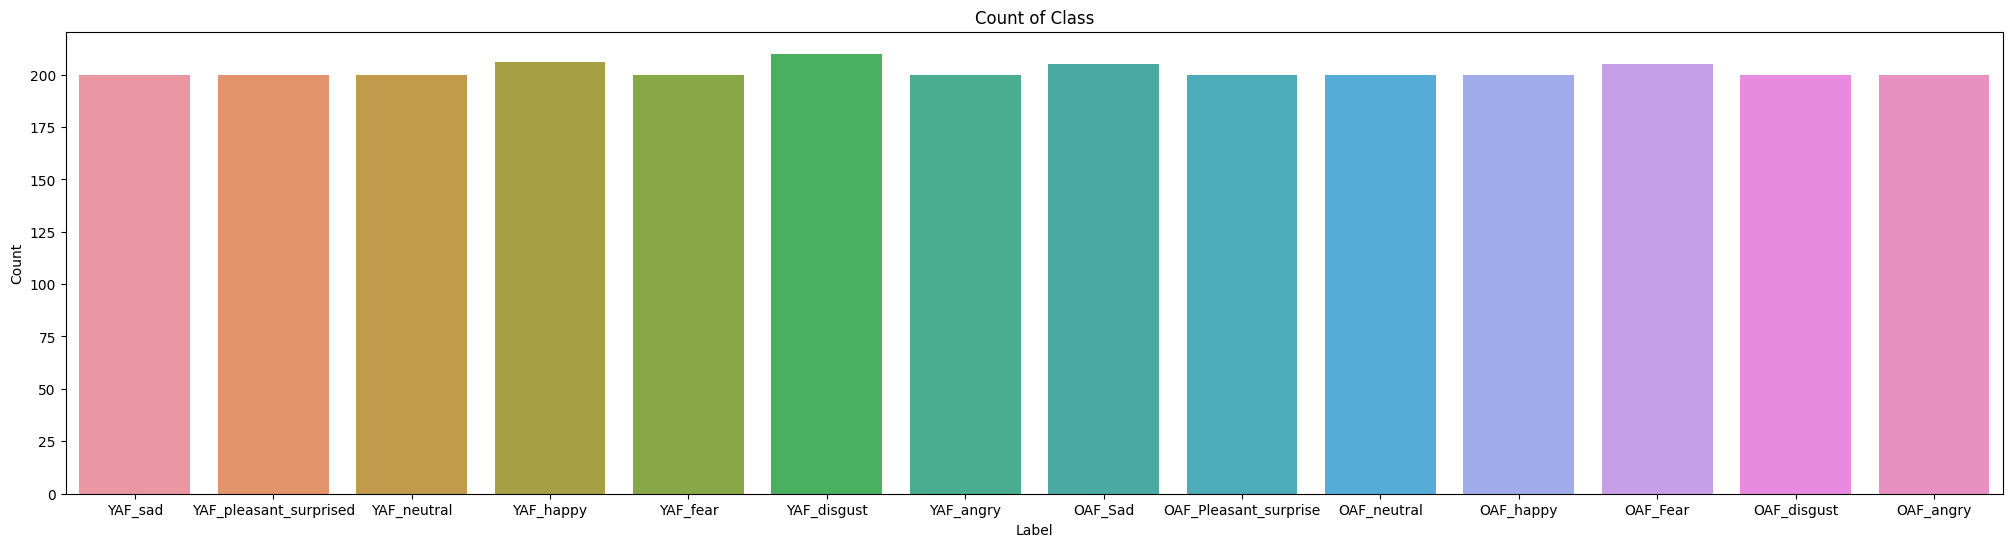

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='Label')
plt.title('Count of Class')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

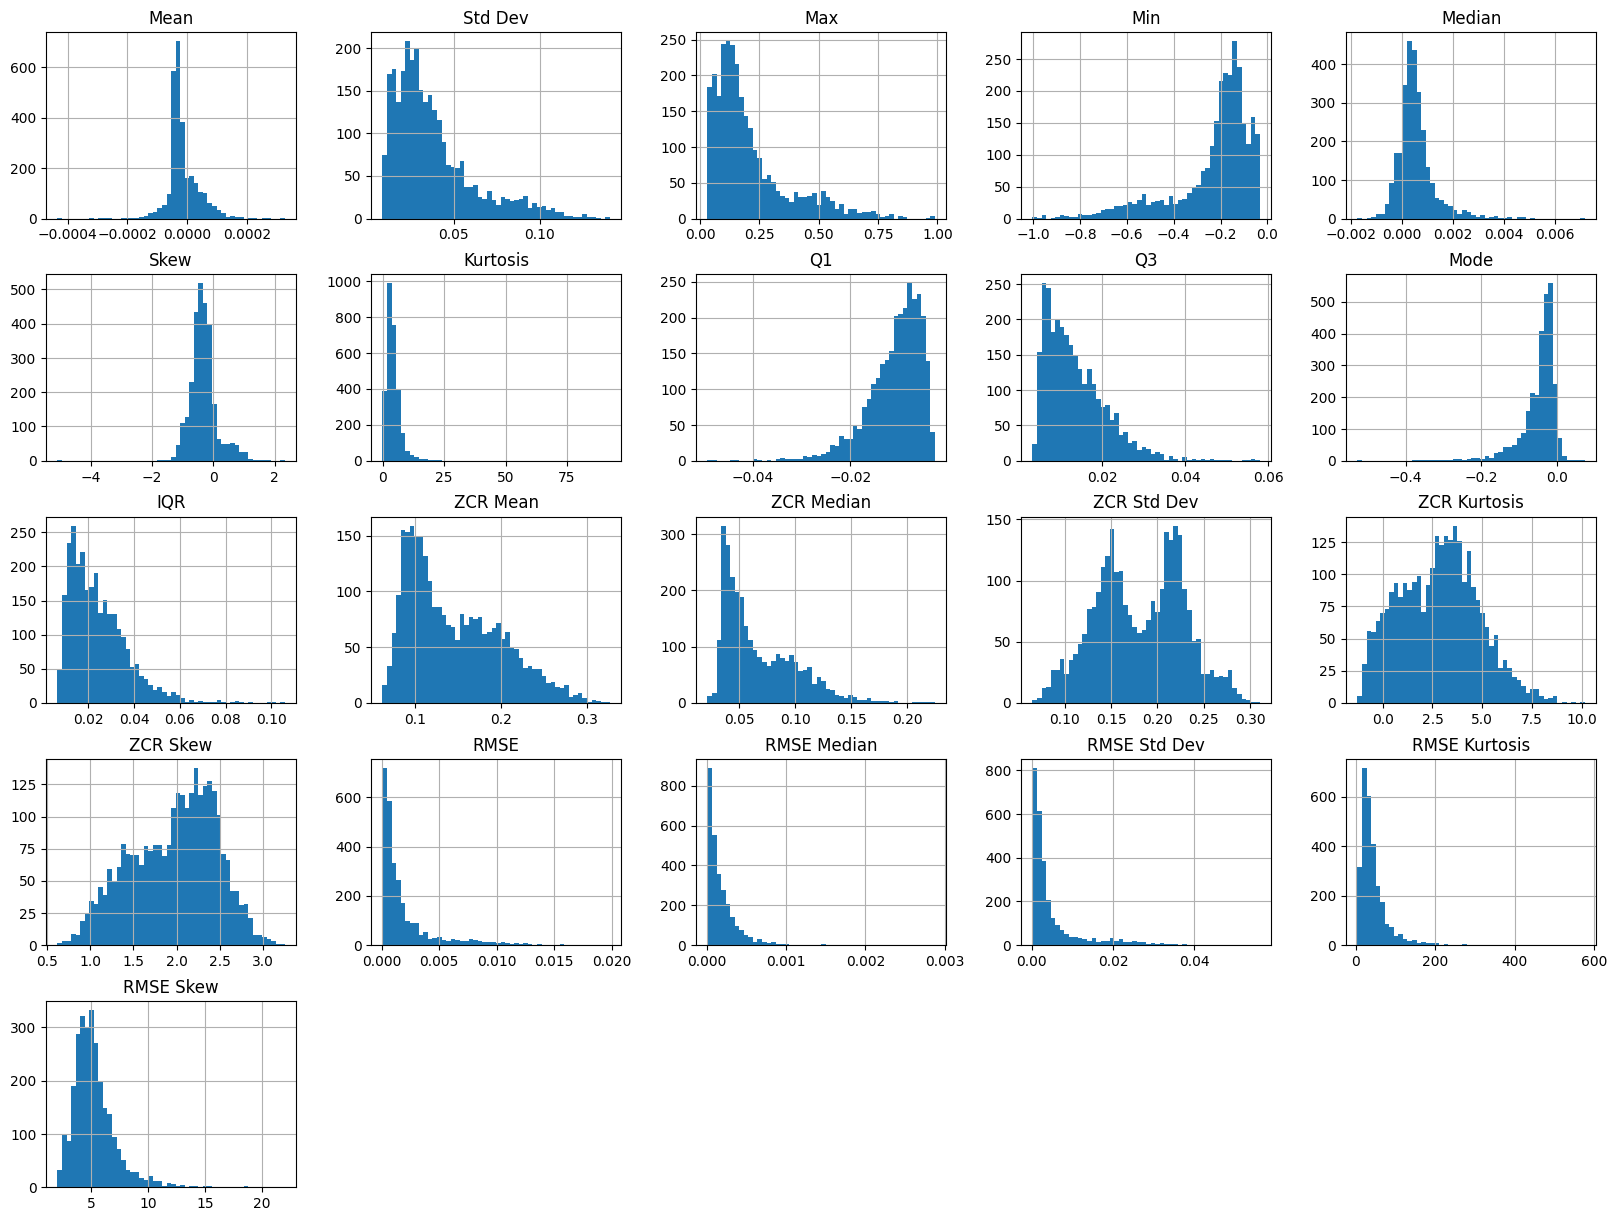

In [ ]:
# histogram
# df.hist(bins=50, figsize=(20, 15)) digunakan untuk membuat histogram untuk setiap kolom dalam DataFrame 'df'
# bins=50 menentukan jumlah bin (batang) pada histogram
# figsize=(20, 15) menentukan ukuran gambar plot histogram (lebar: 20 inch, tinggi: 15 inch)
df.hist(bins=50, figsize=(20, 15))

# plt.show() digunakan untuk menampilkan plot histogram yang telah dibuat
plt.show()


# **3. Penjelasan Preprocessing dan Model**

# - - -  **PREPROCESSING** - - -

Preprocessing data merupakan tahap penting dalam analisis data yang bertujuan untuk membersihkan, mengubah, dan mempersiapkan data mentah menjadi format yang lebih cocok dan bermanfaat untuk analisis lebih lanjut.

Preprocessing pada data berikut adalah :
- normalisasi


**NORMALISASI**

- Normalisasi adalah proses transformasi data sehingga nilainya berada dalam rentang tertentu atau memiliki distribusi yang sesuai untuk analisis atau pemodelan yang lebih baik. Normalisasi dapat menggunakan berbagai metode, salah satunya adalah Normalisasi Z-Score.


- Normalisasi Z-Score adalah salah satu teknik normalisasi yang menggunakan nilai rata-rata dan deviasi standar dari data untuk mengubah nilai-nilai tersebut ke dalam distribusi standar (distribusi normal dengan mean 0 dan standar deviasi 1).


*normalisasi yang digunakan disini adalah* **Z-Score**

Rumus Normalisasi Z-Score:

$ Z = \frac{{X - \mu}}{{\sigma}} $

- $Z$ adalah skor Z (Z-score).
- $X$ adalah nilai yang akan dinormalisasi.
- $\mu\$ adalah rerata (mean) dari sampel.

- $\sigma\$ adalah deviasi standar (standard deviation) dari sampel.

In [ ]:
from sklearn.preprocessing import StandardScaler  # Import library untuk StandardScaler dari scikit-learn
# Baca file CSV
df = pd.read_csv("hasil_belum_normalisasi_data.csv")  # Membaca file CSV dan menyimpannya ke dalam DataFrame 'df'
# Tentukan kolom yang akan distandarisasi
kolom = ['ZCR Mean', 'ZCR Median', 'ZCR Std Dev', 'ZCR Kurtosis', 'ZCR Skew', 'RMSE', 'RMSE Median', 'RMSE Std Dev', 'RMSE Kurtosis', 'RMSE Skew']
# Inisialisasi StandardScaler
scaler = StandardScaler()  # Membuat objek StandardScaler
# Lakukan standarisasi pada kolom yang telah ditentukan
df[kolom] = scaler.fit_transform(df[kolom])  # Melakukan standarisasi terhadap kolom yang telah ditentukan
# Simpan DataFrame yang telah distandarisasi ke dalam file CSV baru
df.to_csv("normalisasi.csv", index=False)  # Menyimpan DataFrame yang telah distandarisasi ke dalam file CSV baru tanpa menyertakan indeks

**menampilkan data sebelum normalisasi**

In [ ]:
#menampilkan data sebelum normalisasi
data = pd.read_csv('/content/drive/MyDrive/psd/tugas/dataset/hasil_belum_normalisasi_data.csv')
data.head()

,Label,File,Mean,Std Dev,Max,Min,Median,Skew,Kurtosis,Q1,...,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,YAF_sad,YAF_gun_sad.wav,-0.000037,0.040422,0.189675,-0.256394,0.001648,-0.833171,3.038635,-0.013396,...,0.120675,0.031738,0.213727,4.035268,2.365840,0.001634,0.000370,0.003669,46.920462,5.442339
1,YAF_sad,YAF_kite_sad.wav,-0.000042,0.067411,0.212716,-0.342954,0.000866,-0.961224,3.036051,-0.013428,...,0.128906,0.042725,0.188613,3.983807,2.231187,0.004544,0.000465,0.010200,25.073912,4.249242
2,YAF_sad,YAF_chalk_sad.wav,-0.000041,0.028194,0.087021,-0.138463,0.000486,-0.830024,2.545585,-0.007891,...,0.156728,0.054688,0.212845,2.263854,1.878469,0.000795,0.000116,0.001696,17.400231,3.729030
3,YAF_sad,YAF_ditch_sad.wav,-0.000045,0.038574,0.128314,-0.200071,0.000243,-1.062977,4.283960,-0.006174,...,0.181592,0.080322,0.214732,1.578488,1.637079,0.001488,0.000089,0.003731,24.639512,4.422699
4,YAF_sad,YAF_king_sad.wav,-0.000049,0.048603,0.145485,-0.238286,0.003107,-1.018139,2.485092,-0.014356,...,0.116320,0.035645,0.194429,4.360756,2.373166,0.002362,0.000460,0.005005,21.872130,4.093238


**menampilkan data sesudah normalisasi**

In [ ]:
# Menampilkan data sesudah dinormalisasi
# Menggunakan pandas untuk membaca data dari file CSV 'normalisasi.csv'
norm = pd.read_csv('normalisasi.csv')
# Menyimpan data dari file CSV ke dalam variabel 'norm'

In [ ]:
import pickle
# Simpan hasil normalisasi ke file pickle
with open('normalisasi.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# - - -  **MODEL** - - -

**Memisahkan dataset menjadi fitur (X) dan target (y)**

In [ ]:
X = norm.drop(['Label','File'], axis=1)
y = norm['Label']

# **SPLIT DATA**
Fungsinya untuk membagi dataset menjadi data pelatihan dan pengujian.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X, y, random_state=1, test_size=0.2)

In [ ]:
# Menampilkan dimensi (bentuk) dari data latih (Training) dan data uji (Testing) untuk fitur (X) dan target (y)
# Menggunakan fungsi shape untuk menunjukkan jumlah baris dan kolom dari setiap data

print(f'Training Shape x:',X_train.shape)  # Menampilkan bentuk data latih untuk fitur (X)
print(f'Testing Shape x:',X_test.shape)    # Menampilkan bentuk data uji untuk fitur (X)
print('*****___________*****___________*****')  # Membuat pemisah visual antara informasi data latih dan data uji

print(f'Training Shape y:',X.shape)       # Menampilkan bentuk data latih untuk target (y)
print(f'Testing Shape y:',y.shape)        # Menampilkan bentuk data uji untuk target (y)

Training Shape x: (2260, 21)
Testing Shape x: (566, 21)
*****___________*****___________*****
Training Shape y: (2826, 21)
Testing Shape y: (2826,)


In [ ]:
scaler.fit(X_train)  # Fitting scaler dengan X_train

# Pastikan X_test memiliki kolom yang sama dengan X_train sebelum melakukan transformasi
X_test = X_test[X_train.columns]

# Sekarang, lakukan transformasi dengan kolom yang sesuai
X_test_scaled = scaler.transform(X_test)

# Melakukan transformasi pada X_train
X_train_scaled = scaler.transform(X_train)

# **KNN**

K-Nearest Neighbors (KNN) adalah algoritma yang digunakan dalam masalah klasifikasi dan regresi. Prinsip dasar KNN adalah memprediksi label dari suatu data berdasarkan mayoritas label data tetangga terdekatnya.

Klasifikasi dengan KNN:

Misalnya, untuk klasifikasi suatu data baru $x$, KNN akan menentukan kelasnya berdasarkan mayoritas kelas dari $k$ tetangga terdekatnya.

Rumus untuk menentukan kelas dengan KNN adalah sebagai berikut:

Jika
$x$ adalah data yang akan diprediksi kelasnya:

1. Hitung jarak antara $x$ dan semua data dalam dataset.
2. Pilih $k$ tetangga terdekat (yang memiliki jarak terkecil) dari $x$
3. Tentukan kelas mayoritas dari $k$ tetangga tersebut.
4. $x$ diklasifikasikan sebagai kelas mayoritas dari $k$ tetangga tersebut.

$k$ : Jumlah tetangga yang akan digunakan untuk melakukan prediksi. Ini adalah parameter yang mengontrol jumlah tetangga terdekat yang akan dipertimbangkan dalam menentukan label kelas untuk sampel yang baru. Umumnya, nilai $k$ harus merupakan bilangan bulat positif.


Jarak Euclidean antara dua titik $x$ dan $y$ dalam ruang $n$ dimensi adalah:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$

dimana :
- $d(x, y)$ : jarak Euclidean antara dua titik $x$ dan $y$.
- $x$ dan $y$ : vektor dalam ruang $n$ dimensi yang masing-masing memiliki $n$ komponen atau fitur.
- $n$ : jumlah dimensi atau jumlah fitur dalam ruang dimensi tersebut.
- $x_i$ dan $y_i$ : nilai dari fitur ke-$i$ pada vektor $x$ dan $y$ secara berturut-turut.
- $\sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$ : perhitungan jarak Euclidean antara dua vektor $x$ dan $y$ dalam ruang $n$ dimensi. Ini dihitung dengan mengurangkan setiap fitur dari titik $x$ dengan fitur yang sesuai dari titik $y$, kemudian mengkuadratkannya, menjumlahkan hasilnya, dan mengambil akar kuadrat dari jumlah tersebut.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
K = 40  # Jumlah nilai K yang akan diuji

acc = np.zeros((K-1))  # Membuat array kosong dengan panjang (K-1) untuk menyimpan akurasi

# Loop untuk mencari akurasi pada nilai K yang berbeda
for n in range(1, K, 2):  # Loop akan berjalan mulai dari 1 hingga K (40) dengan loncatan 2
    # Membuat model KNN dengan nilai K = n, menggunakan jarak Euclidean sebagai metrik
    knn = KNeighborsClassifier(n_neighbors=n, metric="euclidean").fit(X_train_scaled, y_train)

    # Melakukan prediksi pada data uji menggunakan model KNN yang telah dibuat
    y_pred = knn.predict(X_test_scaled)

    # Menghitung akurasi dan menyimpannya dalam array acc pada indeks (n-1)
    acc[n-1] = accuracy_score(y_test, y_pred)

# Menampilkan nilai akurasi tertinggi beserta nilai K yang memberikan akurasi tersebut
print('akurasi terbaik adalah', acc.max(), 'dengan nilai k =', acc.argmax() + 1)

akurasi terbaik adalah 0.7826855123674912 dengan nilai k = 25


# **REDUKSI DATA**

Reduksi data adalah proses mengurangi jumlah fitur (kolom) dalam dataset sedemikian rupa sehingga tetap mempertahankan informasi yang penting. Hal ini dilakukan untuk beberapa alasan:

1. Efisiensi Komputasi: Dataset dengan fitur yang sangat banyak dapat membutuhkan sumber daya komputasi yang besar. Dengan mengurangi jumlah fitur, waktu dan sumber daya yang diperlukan untuk proses analisis atau pemodelan dapat berkurang secara signifikan.

2. Mengatasi Masalah "Curse of Dimensionality": Ketika jumlah fitur (dimensi) sangat besar, terkadang data dapat menjadi jarang atau terlalu tersebar, yang dapat mengakibatkan kesulitan dalam memodelkan dan memahami pola di dalamnya. Reduksi dimensi membantu mengurangi masalah ini.

3. Meningkatkan Kinerja Model: Dengan mengurangi dimensi, model bisa lebih cenderung untuk mempelajari pola-pola yang lebih penting dalam data dan mengurangi kemungkinan overfitting.

**Principal Component Analysis (PCA)** adalah salah satu teknik yang umum digunakan untuk reduksi dimensi. PCA melakukan transformasi linier pada data untuk mengubahnya ke dalam sistem koordinat baru di mana sumbu baru (komponen utama) ditentukan sedemikian rupa sehingga data tersebar seoptimal mungkin. Komponen-komponen utama ini dipesan berdasarkan variansnya, dengan komponen pertama memiliki varians tertinggi di antara semua komponen. Dengan menggunakan PCA, kita dapat memilih sejumlah komponen yang paling penting untuk mempertahankan sebagian besar varians data, sambil mengurangi dimensi.

Kelebihan PCA:

- Reduksi Dimensi: PCA mengurangi dimensi data dengan mempertahankan sebagian besar varians yang ada.
- Menghilangkan Korelasi: PCA dapat menghilangkan korelasi antarfitur dalam dataset.
- Mempercepat Komputasi: Dengan memproyeksikan data ke ruang dimensi yang lebih rendah, PCA dapat mempercepat proses komputasi.

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA

# Menginisialisasi objek PCA dengan 8 komponen sebagai n_components
sklearn_pca = sklearnPCA(n_components=8)

# Melakukan transformasi PCA pada data X_train_scaled (data yang telah discaling sebelumnya)
# dan menyimpan hasil transformasi dalam variabel X_train_pca
X_train_pca = sklearn_pca.fit_transform(X_train_scaled)

# Melihat tipe data dari X_train_pca setelah transformasi PCA
type(X_train_pca)

numpy.ndarray

In [ ]:
# Menyimpan model PCA yang telah dilatih ke dalam file 'ini_model_pca_zscore_component8.pkl'
import pickle

# Simpan model PCA yang telah dilatih ke dalam file 'ini_model_pca_zscore_component8.pkl'
with open('ini_model_pca_zscore_component8.pkl', 'wb') as file:
    pickle.dump(sklearn_pca, file)


import pickle

# Memuat kembali model PCA dari file yang disimpan sebelumnya
with open('ini_model_pca_zscore_component8.pkl', 'rb') as pca:
    loadpca = pickle.load(pca)


In [ ]:
# Menggunakan hasil transformasi PCA yang sudah dilakukan sebelumnya pada data uji yang sudah discaling
X_test_pca = loadpca.transform(X_test_scaled)

# Menampilkan bentuk (shape) dari data uji yang sudah melalui proses PCA
X_test_pca.shape

(566, 8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Mengimpor KNeighborsClassifier dari library sklearn.neighbors

classifier = KNeighborsClassifier(n_neighbors=15)  # Membuat objek classifier dengan menggunakan KNeighborsClassifier dengan parameter n_neighbors=15
# n_neighbors=15 menandakan bahwa jumlah tetangga yang akan dipertimbangkan oleh algoritma KNN adalah 15.

classifier.fit(X_train_pca, y_train)
# Melatih model KNeighborsClassifier dengan data X_train_pca (data latih yang sudah melalui PCA atau Principal Component Analysis) sebagai fitur dan y_train sebagai target.

KNeighborsClassifier(n_neighbors=15)

In [ ]:
# Menggunakan model klasifikasi yang sudah dilatih untuk melakukan prediksi
# pada data yang sudah direduksi dimensinya menggunakan PCA (X_test_pca)
y_prediction = classifier.predict(X_test_pca)

# Menyimpan hasil prediksi dalam variabel y_prediction

In [ ]:
# Menghitung akurasi model dengan menggunakan data prediksi (y_prediction) dan data asli (y_test)
acc_pca = accuracy_score(y_test, y_prediction)

# Menampilkan nilai akurasi model
print("Akurasi:", acc_pca)

Akurasi: 0.7190812720848057


In [ ]:
# Menggunakan modul pickle untuk menyimpan model klasifikasi ke dalam sebuah file
# 'knn_pca_zscore.pkl' adalah nama file yang akan menyimpan model tersebut
# classifier adalah variabel yang berisi model klasifikasi yang telah dilatih sebelumnya

import pickle

# Menyimpan model klasifikasi ke dalam file 'knn_pca_zscore.pkl' dengan pickle
with open('knn_pca_zscore.pkl', 'wb') as file:
    pickle.dump(classifier, file)


# **Link Aplikasi deployment menggunakan streamlit ada di https://prediksiemosidataaudio.streamlit.app/**


# **Link Google Colab code di https://colab.research.google.com/drive/1Ld1IclXcKmeLfN5zAaMcrVJPTo5E4vkG?usp=sharing**
